In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Set a random seed for reproducibility
np.random.seed(0)
data = pd.read_csv('Weather Data.csv')

data['Date/Time'] = pd.to_datetime(data['Date/Time'])
 
# Resetting the index
data.set_index('Date/Time', inplace=True)
 
data.dropna(inplace=True)

In [65]:
data.describe

<bound method NDFrame.describe of                      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86                4   
2012-01-01 01:00:00    -1.8              -3.7         87                4   
2012-01-01 02:00:00    -1.8              -3.4         89                7   
2012-01-01 03:00:00    -1.5              -3.2         88                6   
2012-01-01 04:00:00    -1.5              -3.3         88                7   
...                     ...               ...        ...              ...   
2012-12-31 19:00:00     0.1              -2.7         81               30   
2012-12-31 20:00:00     0.2              -2.4         83               24   
2012-12-31 21:00:00    -0.5              -1.5         93               28   
2012-12-31 22:00:00    -0.2              -1.8         89               28   
2012-12-31 23:00:00     0.0              -

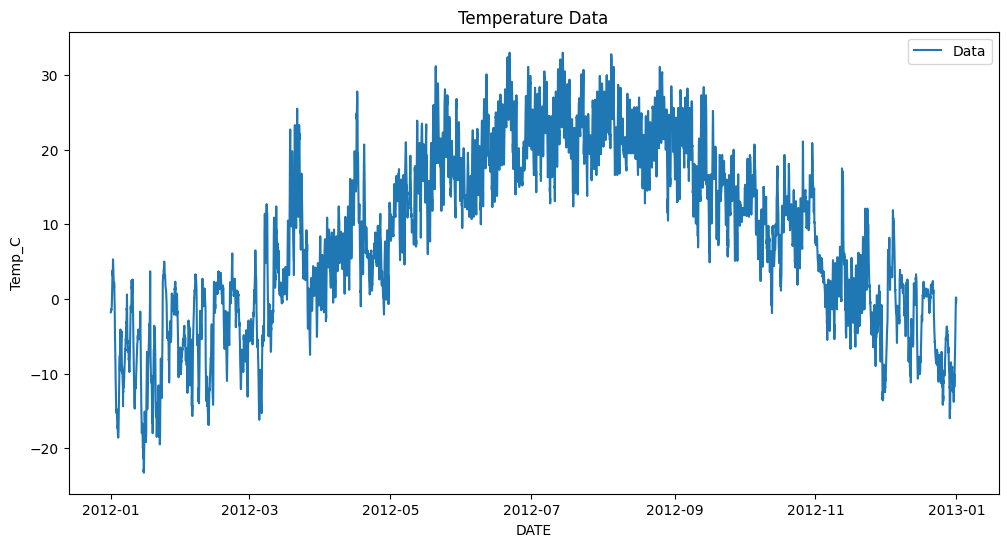

In [66]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['Temp_C'], label='Data')
plt.xlabel('DATE')
plt.ylabel('Temp_C')
plt.legend()
plt.title('Temperature Data')
plt.show()

In [67]:
# Adding lag features to the DataFrame
for i in range(1, 6):  # Creating lag features up to 5 days
    data[f'Lag_{i}'] = data['Temp_C'].shift(i)
 
# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.9 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Reset index for both train and test data
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

 
# # Split the data into training and testing sets
# train_size = int(0.8 * len(data))
# train_data = data[:train_size]
# test_data = data[train_size:]
 
# Define the input features (lag features) and target variable
 
y_train = train_data['Temp_C']
 
y_test = test_data['Temp_C']

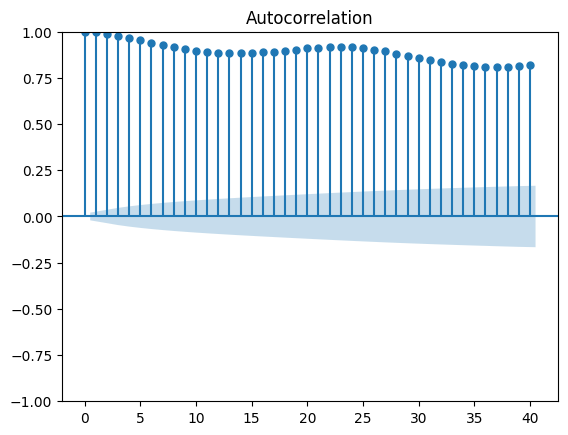

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
series = data['Temp_C']
plot_acf(series)
plt.show()

In [69]:
data['Temp_C'].corr(data['Temp_C'].shift(1))


0.9960972606164673

In [95]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model
lag_order = 980 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


In [96]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 5.51


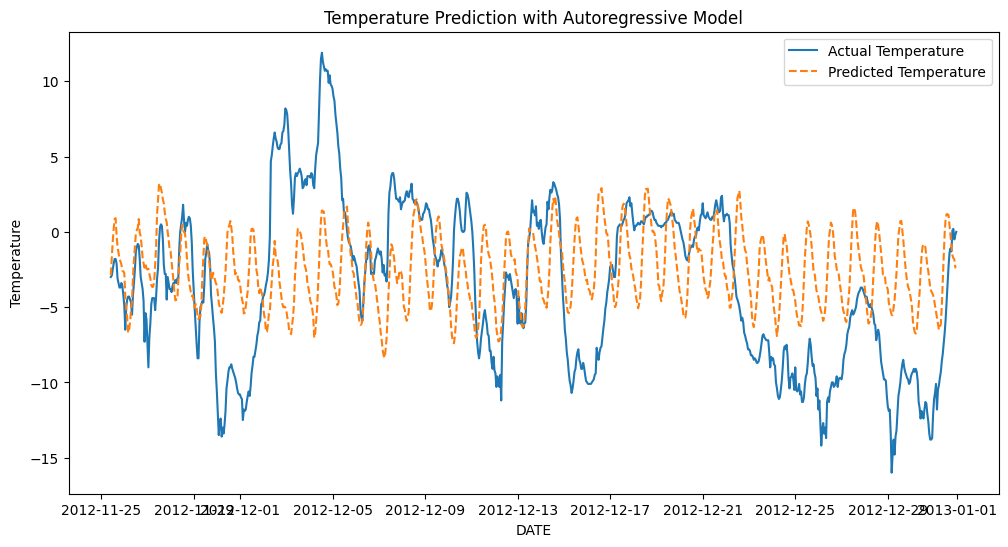

In [97]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data["Date/Time"] ,y_test, label='Actual Temperature')
plt.plot( test_data["Date/Time"],y_pred, label='Predicted Temperature', linestyle='--')
plt.xlabel('DATE')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature Prediction with Autoregressive Model')
plt.show()
